In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
df_clustered = pd.read_json('df_slim_rotterdam_clustered.json', orient='records', lines=True)
df_clustered.head()

,navigation.time,navigation.location.long,navigation.location.lat,navigation.destination.name,navigation.destination.eta,navigation.status,device.mmsi,vessel.type,vessel.imo,vessel.name,day,hour,minute,cluster
0,1609459588000,4.00828,51.95784,MAASVLAKTE,2021-12-31T16:59:00+00:00,moored,211560210,cargo,0,AARBURG,1,0,6,0
1,1609459769000,4.00827,51.95786,MAASVLAKTE,2021-12-31T16:59:00+00:00,moored,211560210,cargo,0,AARBURG,1,0,9,0
2,1609459948000,4.00828,51.95784,MAASVLAKTE,2021-12-31T16:59:00+00:00,moored,211560210,cargo,0,AARBURG,1,0,12,0
3,1609459948000,4.00828,51.95784,MAASVLAKTE,2021-12-31T16:59:00+00:00,moored,211560210,cargo,0,AARBURG,1,0,12,0
4,1609460669000,4.00828,51.95786,MAASVLAKTE,2021-12-31T16:59:00+00:00,moored,211560210,cargo,0,AARBURG,1,0,24,0


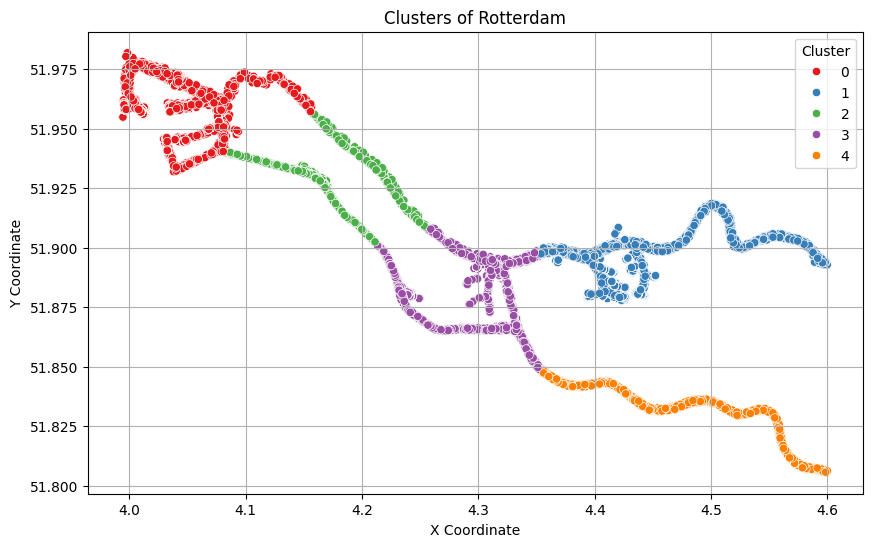

In [7]:
# plot the clusters
plt.figure(figsize=(10, 6))
plt.title('Clusters of Rotterdam')

sns.scatterplot(data=df_clustered, x='navigation.location.long', y='navigation.location.lat', hue='cluster', palette='Set1')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
split1 =[0, 1, 4]
split2 = [2, 3]

# create dataframe with only clusters in split2
df_split2 = df_clustered[df_clustered['cluster'].isin(split2)].copy()

# create dataframe with only clusters in split1
df_split1 = df_clustered[df_clustered['cluster'].isin(split1)].copy()

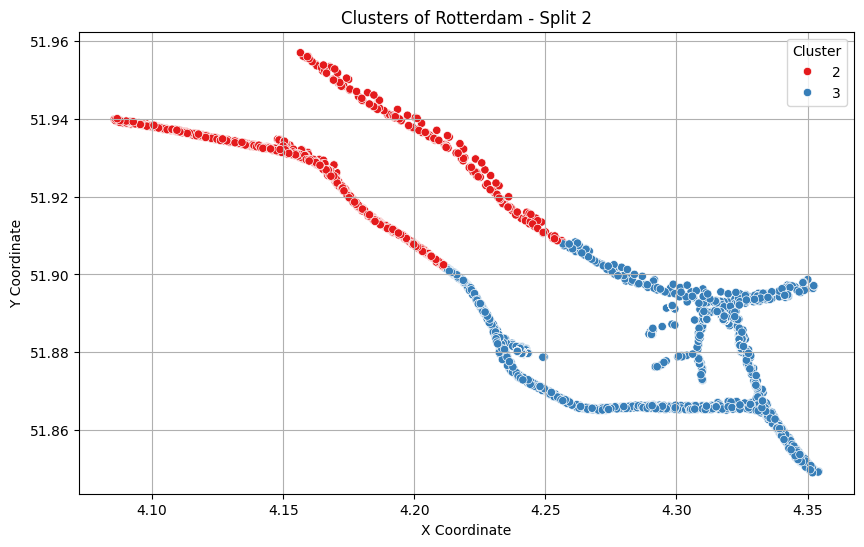

In [9]:
# plot df_split2
plt.figure(figsize=(10, 6))
plt.title('Clusters of Rotterdam - Split 2')

sns.scatterplot(data=df_split2, x='navigation.location.long', y='navigation.location.lat', hue='cluster', palette='Set1')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

oben links: 4.15 / 51.944 \
unten rechts: 4.275 / 51.87

In [17]:
point1 = (4.15, 51.944)
point2 = (4.275, 51.87)

# function which goes through the points
def line_function(x):
    return (point2[1] - point1[1]) / (point2[0] - point1[0]) * (x - point1[0]) + point1[1]


def redistribute(x, y):
    """
    Redistribute the points based on the line function.
    """
    cluster = None
    if x < point1[0]:
        cluster = 3
    elif y < point2[1]:
        cluster = 3
    elif y > line_function(x):
        cluster = 2
    else:
        cluster = 3
    return cluster

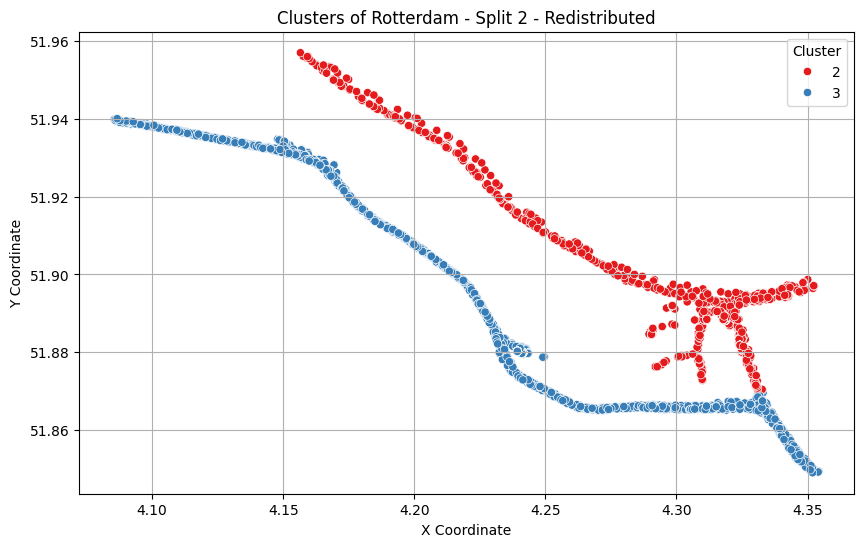

In [19]:
# redistribute the datapoints with the redistribute function
df_split2['cluster'] = df_split2.apply(lambda row: redistribute(row['navigation.location.long'], row['navigation.location.lat']), axis=1)
# plot df_split2
plt.figure(figsize=(10, 6))
plt.title('Clusters of Rotterdam - Split 2 - Redistributed')

sns.scatterplot(data=df_split2, x='navigation.location.long', y='navigation.location.lat', hue='cluster', palette='Set1')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

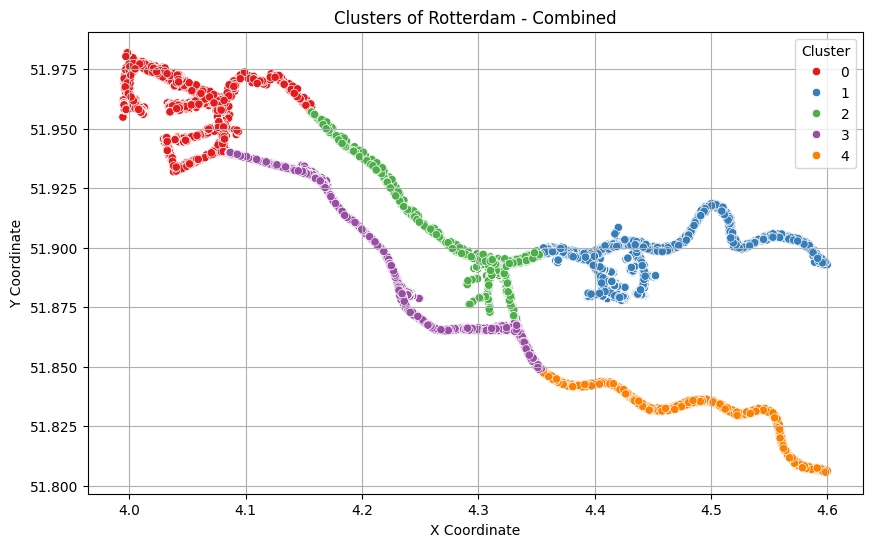

In [20]:
# combine new split2 and old split1
df_combined = pd.concat([df_split1, df_split2], ignore_index=True)
# plot the combined dataframe
plt.figure(figsize=(10, 6))
plt.title('Clusters of Rotterdam - Combined')

sns.scatterplot(data=df_combined, x='navigation.location.long', y='navigation.location.lat', hue='cluster', palette='Set1')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [21]:
# save the combined dataframe to a json file
df_combined.to_json('df_slim_rotterdam_modified.json', orient='records', lines=True)
